## Importing Libraries and Data Sets 

In [1]:
#Imported relevant and necessary libraries and data cleaning tools
import pandas as pd
import numpy as np
import plotly_express as px #plotly express is a library for drawing interactive figures
import matplotlib.pyplot as plt
import seaborn as sns #seaborn is a library that uses matplotlib to make styled plots

from glob import glob as lsdir
import os
import re
import datetime as dt

In [2]:
#load all the excel data and add each individual DataFrame to a list
epl_data09 = pd.read_csv('season-0910_csv.csv')
epl_data10 = pd.read_csv('season-1011_csv.csv')
epl_data11 = pd.read_csv('season-1112_csv.csv')
epl_data12 = pd.read_csv('season-1213_csv.csv')
epl_data13 = pd.read_csv('season-1314_csv.csv')
epl_data14 = pd.read_csv('season-1415_csv.csv')
epl_data15 = pd.read_csv('season-1516_csv.csv')
epl_data16 = pd.read_csv('season-1617_csv.csv')
epl_data17 = pd.read_csv('season-1718_csv.csv')
epl_data18 = pd.read_csv('season-1819_csv.csv')
fnames = [epl_data09, epl_data10, epl_data11, epl_data12, epl_data13, epl_data14, epl_data15, epl_data16, epl_data17, epl_data18]

In [3]:
agg_epl = pd.concat(fnames) #concatonate town data across all rows

In [4]:
#Renaming relevant columns in the data set for improved ease of interpretation
names={'FTHG' : 'Full-time Home Goals',
       'FTAG' : 'Full-time Away Goals',
       'HomeTeam' : 'Home Team',
       'AwayTeam' : 'Away Team',
       'FTR' : 'Full-time Result',
       'HTR' : 'Half-time Result',
       'HTHG' : 'Half-time Home Goals',
       'HTAG' : 'Half-time Away Goals',
       'HS' : 'Home Team Shots',
       'AS' : 'Away Team Shots',
       'HST' : 'Home Team Shots On Target',
       'AST' : 'Away Team Shots On Target',
       'HF' : 'Home Team Fouls Committed',
       'AF' : 'Away Team Fouls Committed',
       'HC' : 'Home Team Corners',
       'AC' : 'Away Team Corners',
       'HY' : 'Home Team Yellows',
       'AY' : 'Away Team Yellows',
       'HR' : 'Home Team Reds',
       'AR' : 'Away Team Reds',
      }
agg_epl.rename(names, inplace=True, axis=1)

In [5]:
agg_epl.head()

,Date,Home Team,Away Team,Full-time Home Goals,Full-time Away Goals,Full-time Result,Half-time Home Goals,Half-time Away Goals,Half-time Result,Referee,...,Home Team Shots On Target,Away Team Shots On Target,Home Team Fouls Committed,Away Team Fouls Committed,Home Team Corners,Away Team Corners,Home Team Yellows,Away Team Yellows,Home Team Reds,Away Team Reds
0,2009-08-15,Aston Villa,Wigan,0,2,A,0,1,A,M Clattenburg,...,5,7,15,14,4,6,2,2,0,0
1,2009-08-15,Blackburn,Man City,0,2,A,0,1,A,M Dean,...,9,5,12,9,5,4,2,1,0,0
2,2009-08-15,Bolton,Sunderland,0,1,A,0,1,A,A Marriner,...,3,13,16,10,4,7,2,1,0,0
3,2009-08-15,Chelsea,Hull,2,1,H,1,1,D,A Wiley,...,12,3,13,15,12,4,1,2,0,0
4,2009-08-15,Everton,Arsenal,1,6,A,0,3,A,M Halsey,...,5,9,11,13,4,9,0,0,0,0


## Create Shot Efficiency and Year Columns

In [16]:
agg_epl['Year'] = pd.DatetimeIndex(agg_epl['Date']).year #extract year variable from the individual date
agg_epl['Home Team Shot Accuracy'] = agg_epl['Home Team Shots On Target']/agg_epl['Home Team Shots']
agg_epl['Away Team Shot Accuracy'] = agg_epl['Away Team Shots On Target']/agg_epl['Away Team Shots']
agg_epl['Home Team Shot Conversion'] = agg_epl['Full-time Home Goals']/agg_epl['Home Team Shots']
agg_epl['Away Team Shot Conversion'] = agg_epl['Full-time Away Goals']/agg_epl['Away Team Shots']

In [17]:
agg_epl.head()

,Date,Home Team,Away Team,Full-time Home Goals,Full-time Away Goals,Full-time Result,Half-time Home Goals,Half-time Away Goals,Half-time Result,Referee,...,Away Team Corners,Home Team Yellows,Away Team Yellows,Home Team Reds,Away Team Reds,Home Team Shot Accuracy,Away Team Shot Accuracy,Home Team Shot Conversion,Away Team Shot Conversion,Year
0,2009-08-15,Aston Villa,Wigan,0,2,A,0,1,A,M Clattenburg,...,6,2,2,0,0,0.454545,0.500000,0.000000,0.142857,2009
1,2009-08-15,Blackburn,Man City,0,2,A,0,1,A,M Dean,...,4,2,1,0,0,0.529412,0.625000,0.000000,0.250000,2009
2,2009-08-15,Bolton,Sunderland,0,1,A,0,1,A,A Marriner,...,7,2,1,0,0,0.272727,0.650000,0.000000,0.050000,2009
3,2009-08-15,Chelsea,Hull,2,1,H,1,1,D,A Wiley,...,4,1,2,0,0,0.461538,0.428571,0.076923,0.142857,2009
4,2009-08-15,Everton,Arsenal,1,6,A,0,3,A,M Halsey,...,9,0,0,0,0,0.625000,0.600000,0.125000,0.400000,2009


In [8]:
home_wins = agg_epl.groupby(['Home Team','Full-time Result']).count()
home_wins = home_wins.loc[:, 'Date':'Away Team']
home_wins.rename({'Date' : 'Count'}, inplace=True, axis=1)
home_wins.sort_values(['Full-time Result', 'Count'], ascending=False, axis=0) #Most home victories across the 9-year period

,,Count,Away Team
Home Team,Full-time Result,,
Man City,H,145,145
Man United,H,133,133
Chelsea,H,130,130
Arsenal,H,129,129
Tottenham,H,120,120
Liverpool,H,115,115
Everton,H,101,101
Stoke,H,71,71
West Ham,H,69,69


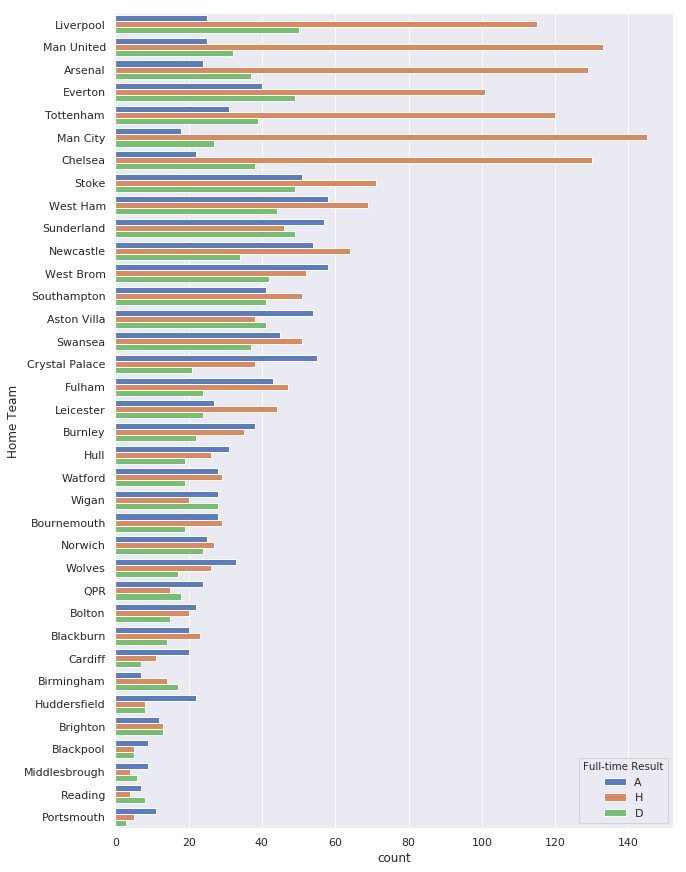

In [9]:
sns.set(rc={'figure.figsize':(10,15)})
sns.countplot(y="Home Team", hue = "Full-time Result", data=agg_epl, 
              order = agg_epl['Home Team'].value_counts().index, palette='muted')

In [10]:
away_wins = agg_epl.groupby(['Away Team','Full-time Result']).count()
away_wins = away_wins.loc[:, 'Date':'Home Team']
away_wins.rename({'Date' : 'Count'}, inplace=True, axis=1)
away_wins.sort_values(['Full-time Result', 'Count'], ascending=[True, False], axis=0) #Most away victories across the 9-year period

,,Count,Home Team
Away Team,Full-time Result,,
Man City,A,102,102
Chelsea,A,93,93
Man United,A,93,93
Tottenham,A,89,89
Arsenal,A,84,84
Liverpool,A,83,83
Everton,A,48,48
Southampton,A,37,37
Crystal Palace,A,36,36


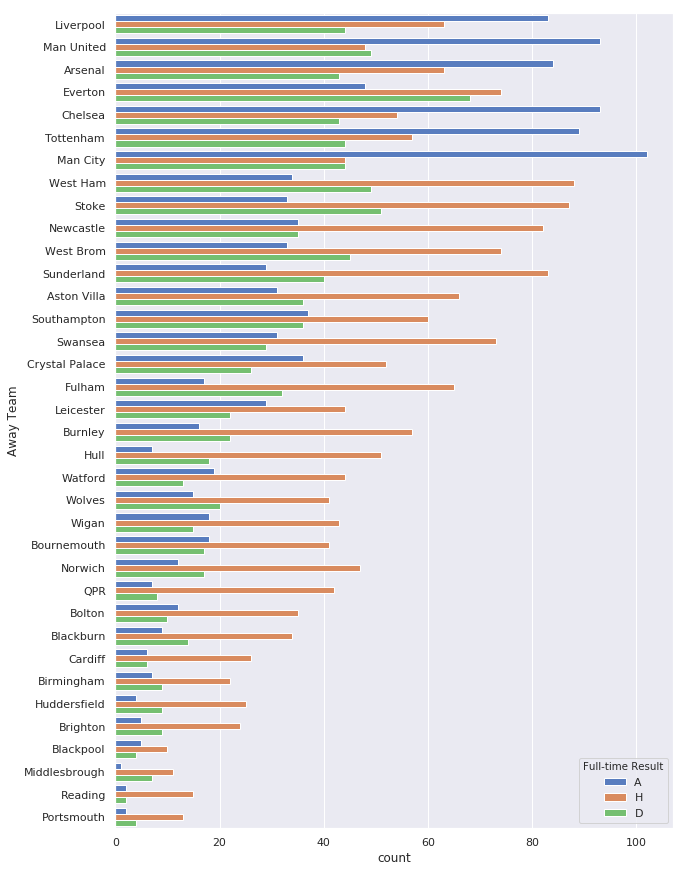

In [11]:
sns.countplot(y="Away Team", hue = "Full-time Result", data=agg_epl, 
              order = agg_epl['Away Team'].value_counts().index, palette='muted')

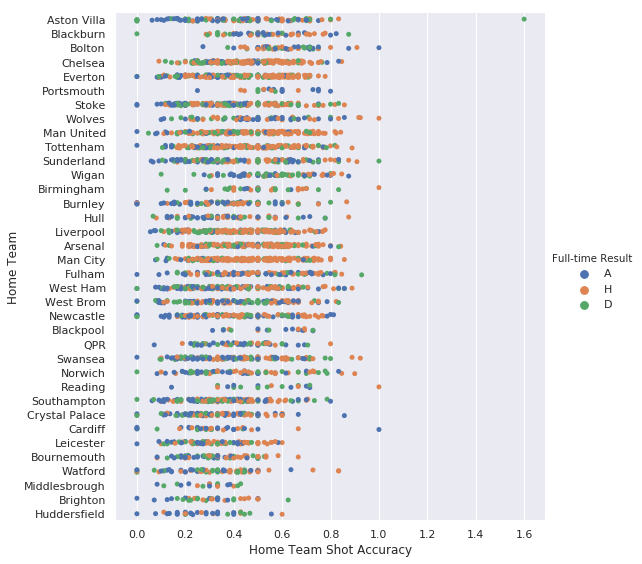

In [47]:
sns.catplot(y="Home Team", x="Home Team Shot Accuracy", hue="Full-time Result", height=8, data=agg_epl)

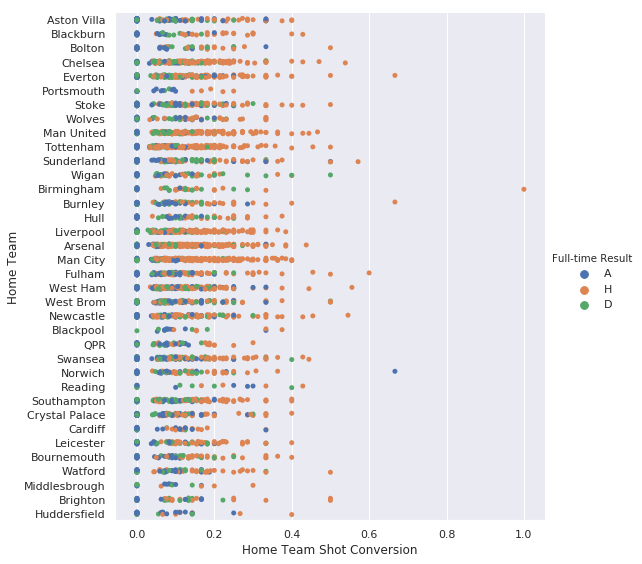

In [42]:
sns.catplot(y="Home Team", x="Home Team Shot Conversion", hue="Full-time Result", height=8, data=agg_epl)

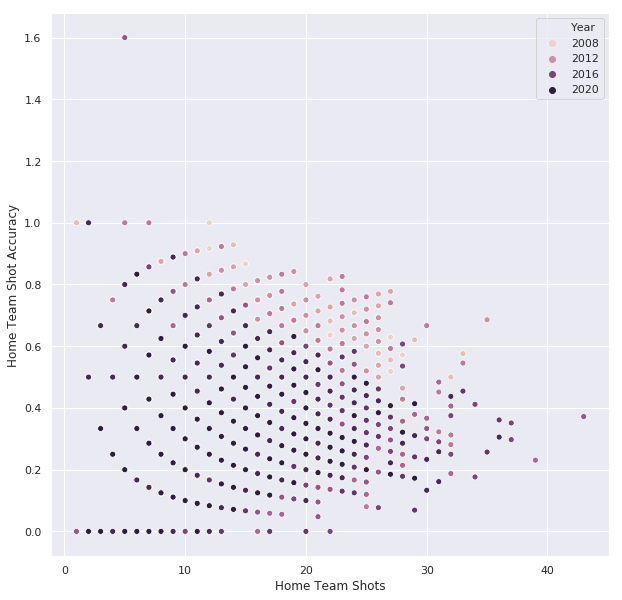

In [50]:
#Early years: medium shots with high accuracy --> many shots with low accuracy --> fewer shots with better accuracy
sns.set(rc={'figure.figsize':(10,10)})
sns.scatterplot(x="Home Team Shots", y="Home Team Shot Accuracy", hue="Year", data=agg_epl)

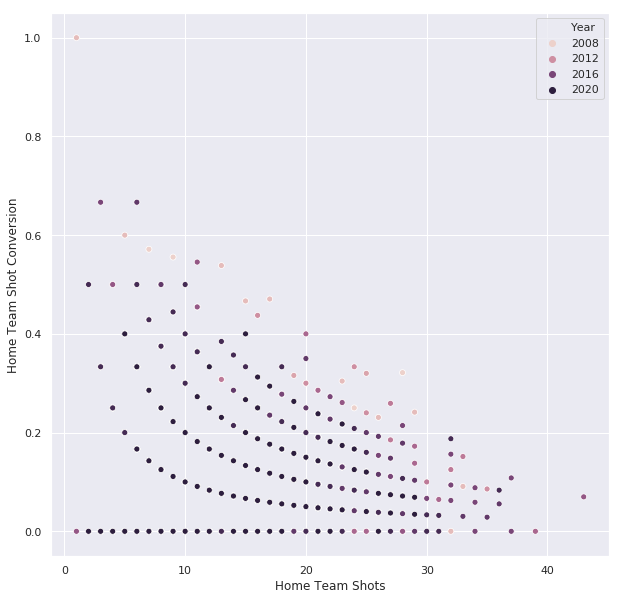

In [56]:
#shot conversion has gone down --> defenses / GK's have gotten better at letting in lower risk shots?
sns.scatterplot(x="Home Team Shots", y="Home Team Shot Conversion", hue="Year", data=agg_epl)

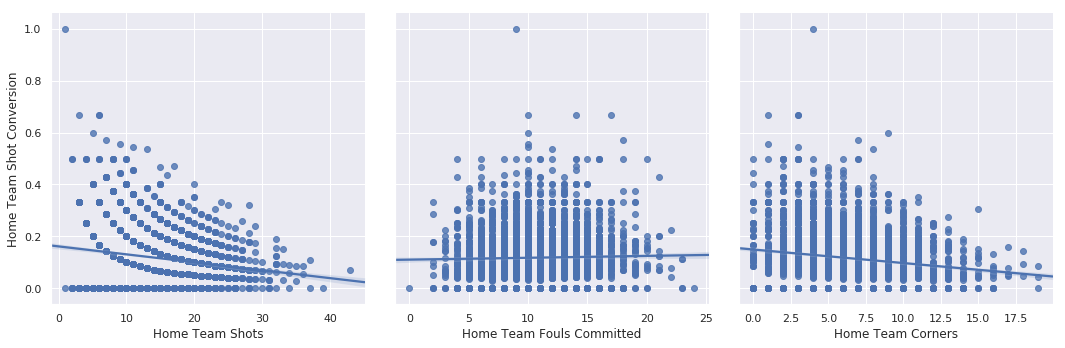

In [64]:
sns.pairplot(x_vars=["Home Team Shots", "Home Team Fouls Committed", "Home Team Corners"], y_vars=["Home Team Shot Conversion"], height = 5, aspect = 1, data=agg_epl, kind="reg")

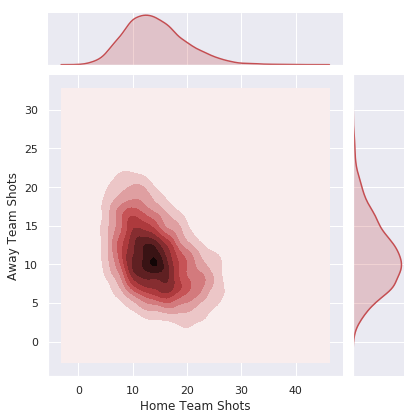

In [82]:
sns.jointplot(x="Home Team Shots", y="Away Team Shots", data=agg_epl, color='r', kind="kde");

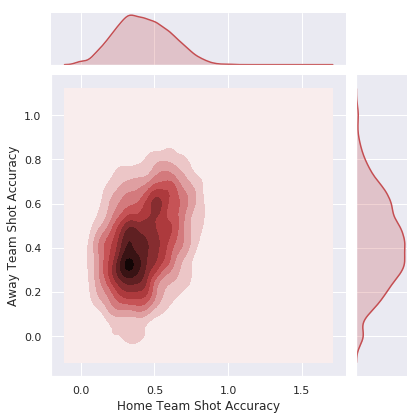

In [85]:
#slightly greater proportion of accurate-shooting away teams
sns.jointplot(x="Home Team Shot Accuracy", y="Away Team Shot Accuracy", data=agg_epl, color='r', kind="kde");

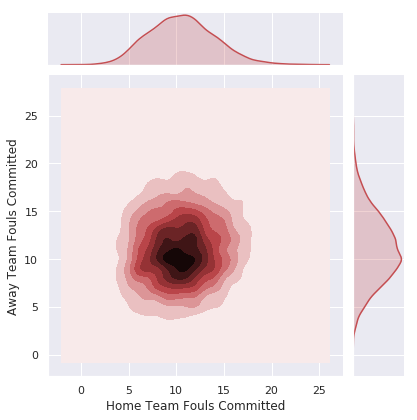

In [84]:
sns.jointplot(x="Home Team Fouls Committed", y="Away Team Fouls Committed", data=agg_epl, color='r', kind="kde");

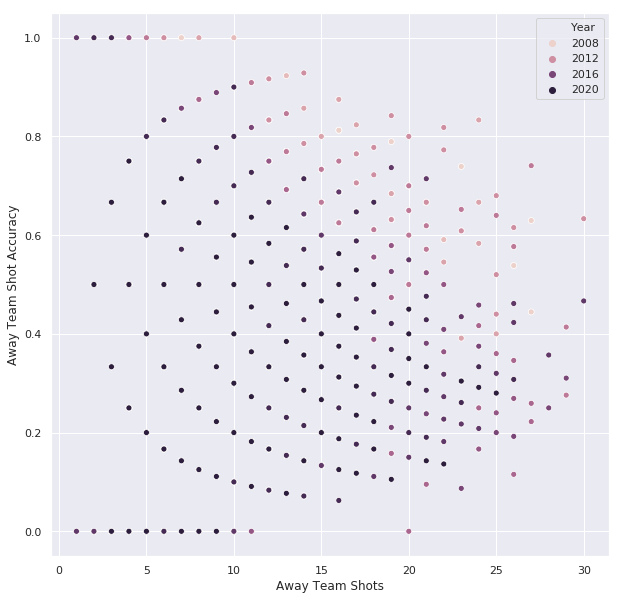

In [81]:
sns.scatterplot(x="Away Team Shots", y="Away Team Shot Accuracy", hue="Year", data=agg_epl)

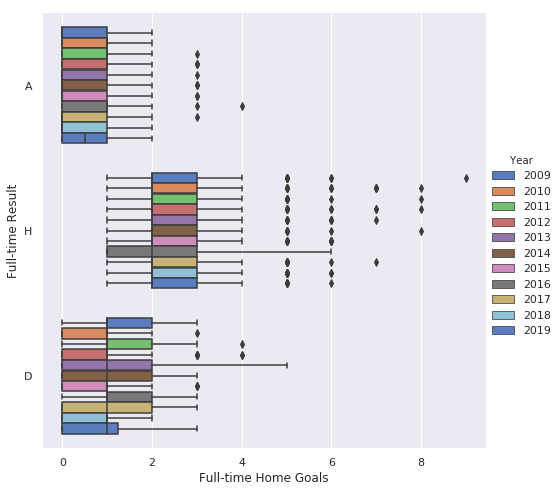

In [74]:
sns.catplot(y="Full-time Result", x="Full-time Home Goals", hue='Year', height=7, kind='box', palette='muted', data=agg_epl)

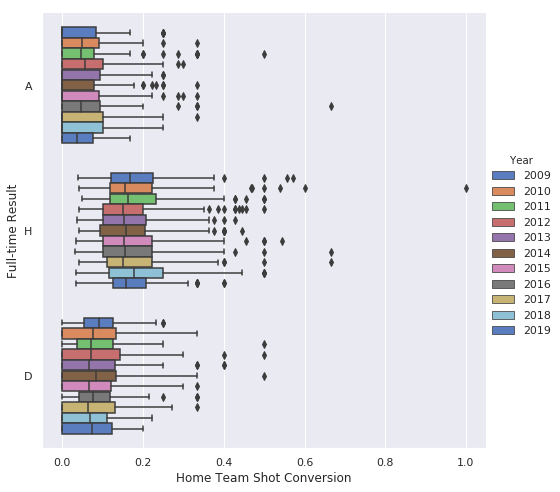

In [73]:
sns.catplot(y="Full-time Result", x="Home Team Shot Conversion", hue='Year', height=7, kind='box', palette='muted', data=agg_epl)

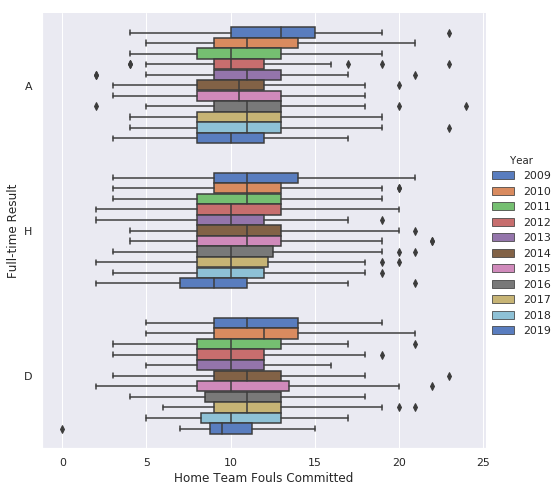

In [75]:
sns.catplot(y="Full-time Result", x="Home Team Fouls Committed", hue='Year', height=7, kind='box', palette='muted', data=agg_epl)

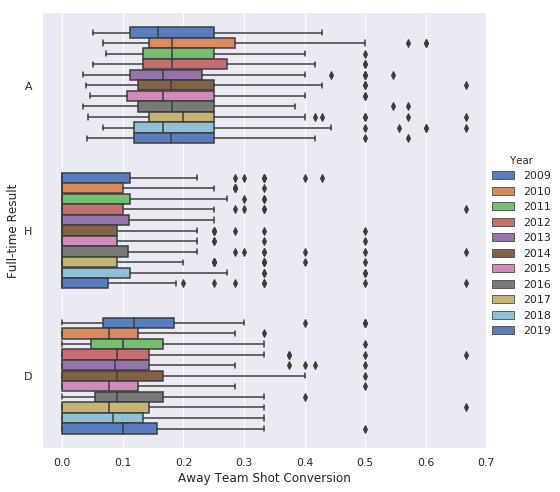

In [86]:
sns.catplot(y="Full-time Result", x="Away Team Shot Conversion", hue='Year', height=7, kind='box', palette='muted', data=agg_epl)

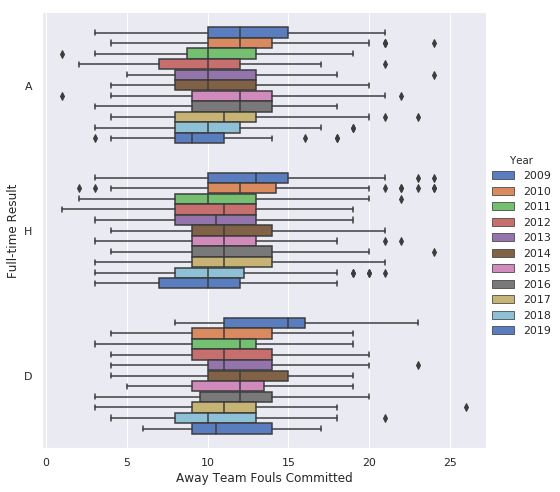

In [87]:
sns.catplot(y="Full-time Result", x="Away Team Fouls Committed", hue='Year', height=7, kind='box', palette='muted', data=agg_epl)

## Referee Trends

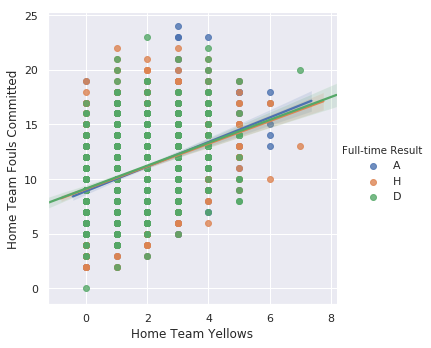

In [79]:
sns.lmplot(x="Home Team Yellows", y="Home Team Fouls Committed", hue="Full-time Result", data=agg_epl)

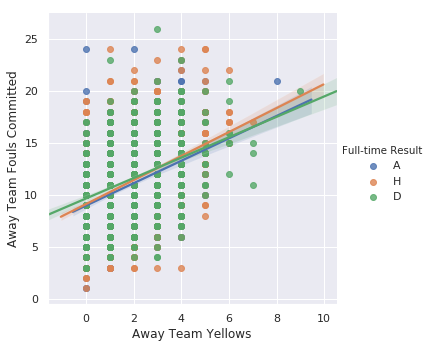

In [80]:
sns.lmplot(x="Away Team Yellows", y="Away Team Fouls Committed", hue="Full-time Result", data=agg_epl)

In [88]:
refs = agg_epl.copy()
refs.set_index('Referee', inplace=True)

In [89]:
mean_refs = pd.DataFrame(refs.groupby('Referee', as_index=True)['Full-time Home Goals'].mean())
agg_refs = pd.DataFrame(refs.groupby('Referee', as_index=True)['Full-time Home Goals'].sum())

In [90]:
agg_refs.head()

,Full-time Home Goals
Referee,
A Madley,4
A Marriner,400
A Taylor,357
A Wiley,45
C Foy,213


In [91]:
mean_refs['Avg Full-time Away Goals']= refs.groupby('Referee', as_index=True)['Full-time Away Goals'].mean().values
mean_refs['Avg Half-time Home Goals']= refs.groupby('Referee', as_index=True)['Half-time Home Goals'].mean().values
mean_refs['Avg Half-time Away Goals']= refs.groupby('Referee', as_index=True)['Half-time Away Goals'].mean().values
mean_refs['Avg Home Team Fouls Committed']= refs.groupby('Referee', as_index=True)['Home Team Fouls Committed'].mean().values
mean_refs['Avg Away Team Fouls Committed']= refs.groupby('Referee', as_index=True)['Away Team Fouls Committed'].mean().values
mean_refs['Avg Home Team Yellows']= refs.groupby('Referee', as_index=True)['Home Team Yellows'].mean().values
mean_refs['Avg Away Team Yellows']= refs.groupby('Referee', as_index=True)['Away Team Yellows'].mean().values
mean_refs['Avg Home Team Reds']= refs.groupby('Referee', as_index=True)['Home Team Reds'].mean().values
mean_refs['Avg Away Team Reds']= refs.groupby('Referee', as_index=True)['Away Team Reds'].mean().values
mean_refs.rename({'Full-time Home Goals' : 'Avg Full-time Home Goals'}, inplace=True, axis = 1)

agg_refs['Tot Full-time Away Goals']= refs.groupby('Referee', as_index=True)['Full-time Away Goals'].sum().values
agg_refs['Tot Half-time Home Goals']= refs.groupby('Referee', as_index=True)['Half-time Home Goals'].sum().values
agg_refs['Tot Half-time Away Goals']= refs.groupby('Referee', as_index=True)['Half-time Away Goals'].sum().values
agg_refs['Tot Home Team Fouls Committed']= refs.groupby('Referee', as_index=True)['Home Team Fouls Committed'].sum().values
agg_refs['Tot Away Team Fouls Committed']= refs.groupby('Referee', as_index=True)['Away Team Fouls Committed'].sum().values
agg_refs['Tot Home Team Yellows']= refs.groupby('Referee', as_index=True)['Home Team Yellows'].sum().values
agg_refs['Tot Away Team Yellows']= refs.groupby('Referee', as_index=True)['Away Team Yellows'].sum().values
agg_refs['Tot Home Team Reds']= refs.groupby('Referee', as_index=True)['Home Team Reds'].sum().values
agg_refs['Tot Away Team Reds']= refs.groupby('Referee', as_index=True)['Away Team Reds'].sum().values
agg_refs.rename({'Full-time Home Goals' : 'Tot Full-time Home Goals'}, inplace=True, axis = 1)

In [92]:
mean_refs.sort_values('Avg Away Team Yellows', ascending=False, inplace=True)
mean_refs.reset_index(inplace=True)
mean_refs.head(20)

,Referee,Avg Full-time Home Goals,Avg Full-time Away Goals,Avg Half-time Home Goals,Avg Half-time Away Goals,Avg Home Team Fouls Committed,Avg Away Team Fouls Committed,Avg Home Team Yellows,Avg Away Team Yellows,Avg Home Team Reds,Avg Away Team Reds
0,Mn Atkinson,1.000000,0.000000,0.000000,0.000000,12.500000,14.500000,1.500000,3.000000,0.000000,0.000000
1,St Bennett,1.000000,4.000000,0.000000,3.000000,9.000000,15.000000,2.000000,3.000000,0.000000,0.000000
2,S Bennett,2.000000,0.678571,0.964286,0.250000,10.928571,12.464286,1.392857,2.285714,0.035714,0.142857
3,P Dowd,1.710692,1.238994,0.817610,0.484277,10.937107,12.320755,1.509434,2.176101,0.075472,0.125786
4,M Atkinson,1.517986,1.093525,0.658273,0.460432,10.597122,11.532374,1.561151,1.931655,0.068345,0.093525
5,M Dean,1.539519,1.219931,0.649485,0.532646,10.570447,10.979381,1.807560,1.907216,0.058419,0.127148
6,C Pawson,1.500000,1.111940,0.656716,0.447761,10.798507,11.328358,1.500000,1.880597,0.074627,0.104478
7,K Friend,1.522167,1.236453,0.625616,0.581281,10.758621,11.364532,1.625616,1.866995,0.044335,0.059113
8,J Moss,1.495000,1.260000,0.625000,0.555000,10.685000,11.250000,1.525000,1.855000,0.075000,0.075000
9,A Wiley,1.730769,1.461538,0.615385,0.846154,12.038462,12.500000,1.269231,1.846154,0.076923,0.115385


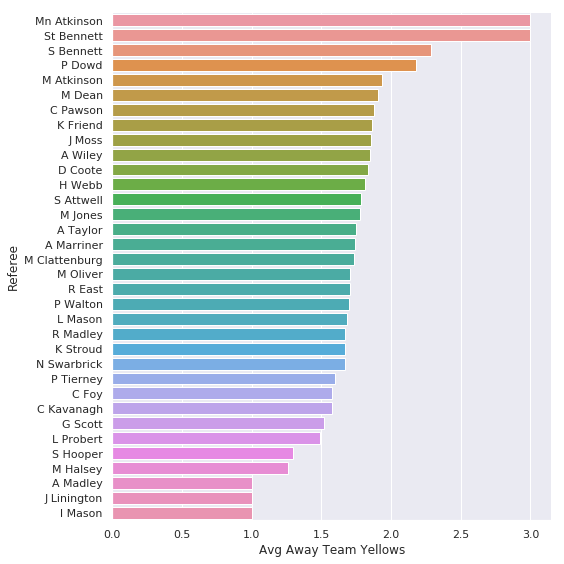

In [93]:
sns.catplot(y='Referee', x='Avg Away Team Yellows', data=mean_refs, kind = 'bar', height=8)

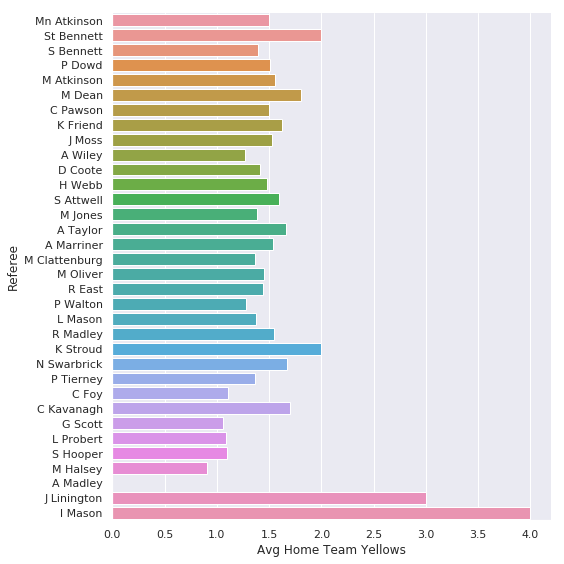

In [94]:
sns.catplot(y='Referee', x='Avg Home Team Yellows', data=mean_refs, kind = 'bar', height=8)

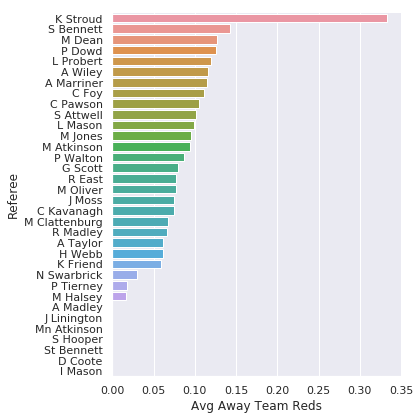

In [95]:
mean_refs.sort_values('Avg Away Team Reds', ascending=False, inplace=True)
sns.catplot(y='Referee', x='Avg Away Team Reds', data=mean_refs, kind = 'bar', height=6)

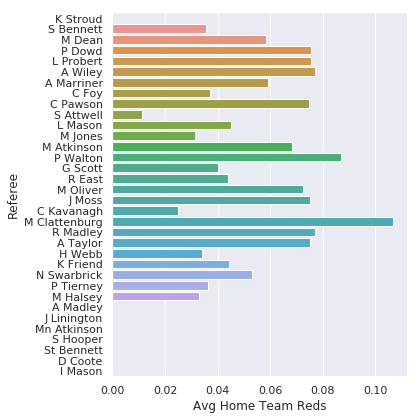

In [96]:
sns.catplot(y='Referee', x='Avg Home Team Reds', data=mean_refs, kind = 'bar', height=6)

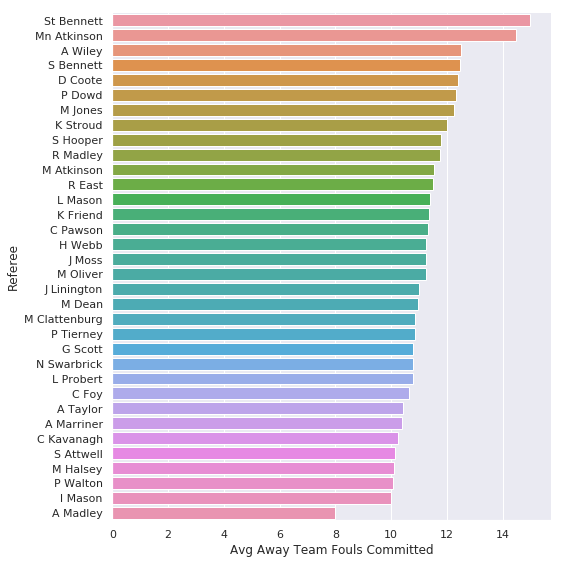

In [97]:
mean_refs.sort_values('Avg Away Team Fouls Committed', ascending=False, inplace=True)
sns.catplot(y='Referee', x='Avg Away Team Fouls Committed', data=mean_refs, kind = 'bar', height=8)

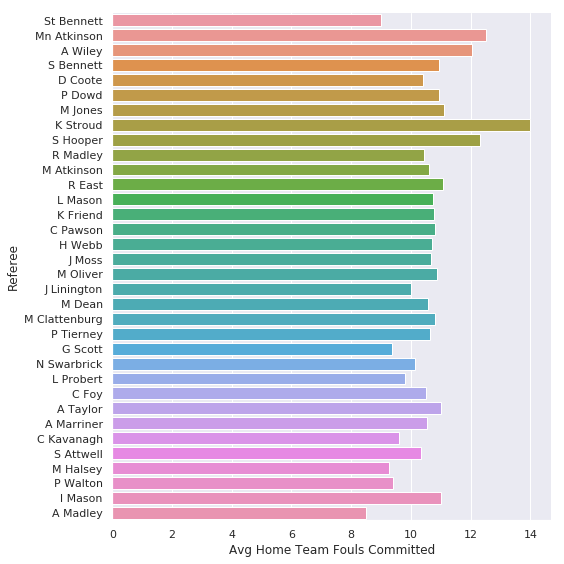

In [98]:
sns.catplot(y='Referee', x='Avg Home Team Fouls Committed', data=mean_refs, kind = 'bar', height=8)

In [99]:
agg_refs.sort_values('Tot Away Team Yellows', ascending=False, inplace=True)
agg_refs.reset_index(inplace=True)
agg_refs.head(20)

,Referee,Tot Full-time Home Goals,Tot Full-time Away Goals,Tot Half-time Home Goals,Tot Half-time Away Goals,Tot Home Team Fouls Committed,Tot Away Team Fouls Committed,Tot Home Team Yellows,Tot Away Team Yellows,Tot Home Team Reds,Tot Away Team Reds
0,M Dean,448,355,189,155,3076,3195,526,555,17,37
1,M Atkinson,422,304,183,128,2946,3206,434,537,19,26
2,A Marriner,400,333,181,152,2670,2634,388,440,15,29
3,M Oliver,385,273,163,123,2547,2630,339,399,17,18
4,A Taylor,357,273,176,111,2491,2359,376,395,17,14
5,K Friend,309,251,127,118,2184,2307,330,379,9,12
6,L Mason,366,265,166,126,2377,2522,304,372,10,22
7,J Moss,299,252,125,111,2137,2250,305,371,15,15
8,M Clattenburg,333,245,155,112,2225,2238,282,358,22,14
9,P Dowd,272,197,130,77,1739,1959,240,346,12,20


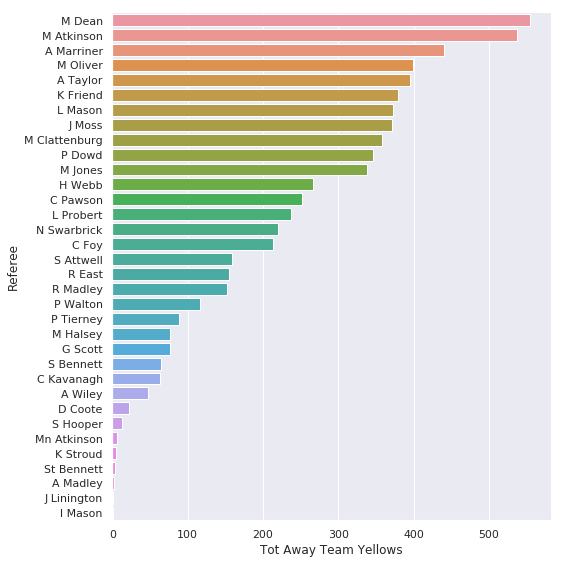

In [100]:
sns.catplot(y='Referee', x='Tot Away Team Yellows', data=agg_refs, kind = 'bar', height=8)

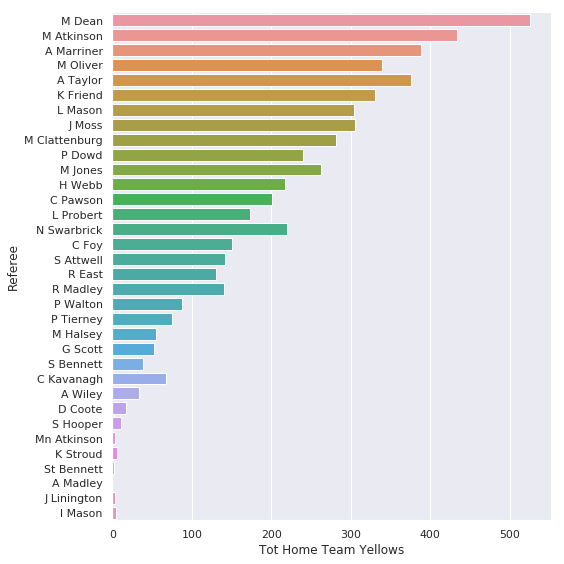

In [101]:
sns.catplot(y='Referee', x='Tot Home Team Yellows', data=agg_refs, kind = 'bar', height=8)